# Crime Data

In [80]:
# Dependencies and Setup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from config import api_key

# API endpoint and API key
base = 'https://api.usa.gov/crime/fbi/cde/'
query = 'arrest/national/all?from=2018&to=2021&API_KEY=' #National Arrests
key = api_key 


In [81]:
# Create a new column for total crimes in the dataframe 
# national_crime_df['total_crimes'] = national_crime_df.iloc[:, 1:].sum(axis=1)


In [82]:
# # Plot the total crimes using a line graph
# plt.plot(national_crime_pivot['Year'], national_crime_pivot['total_crimes'])

# # Label the x and y axes
# plt.xlabel('Year')
# plt.ylabel('Total Crimes')

# # Define a custom FuncFormatter to display the y-axis labels in a custom format
# def y_fmt(y, pos):
#     return '{:,.0f}'.format(y/1e6) + ' million'

# # Use the custom formatter function for the y-axis labels
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

# # Show the plot
# plt.show()

### TEXAS Crime Data

In [83]:
# API endpoint and API key for Texas crime data
base_data = 'https://api.usa.gov/crime/fbi/cde/'
query_tx = 'arrest/state/TX/all?from=2018&to=2021&API_KEY='
key_tx = api_key

# Make the API request for Texas crime data and load the response as JSON
response_tx = requests.get(base_data + query_tx + key_tx)

# Check if the API request was successful
if response_tx.status_code == 200:
    data_data = json.loads(response_tx.content)
else:
    print("Error: API request failed with status code {}".format(response_tx.status_code))
    

In [84]:
# Convert the response to a DataFrame for Texas crime data
tx_crime_df = pd.DataFrame(data_data['data'])
# Rename year column
tx_crime_df = tx_crime_df.rename(columns={'data_year': 'Year'})
tx_crime_df


,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2018,26859,221269,431,9557,1673,7943,73523,147455,58319,...,4028,2183,5915,96591,898,3,531,7627,13693,2576
1,2019,26877,188748,453,8904,1249,7204,69563,124377,50428,...,3029,2149,5877,78332,801,25,537,7370,11678,1635
2,2020,23802,126629,453,7952,1080,5689,59123,86570,31328,...,1482,1769,5220,76722,867,0,660,6383,13465,1136
3,2021,23516,167025,538,7238,456,5474,62245,83778,0,...,1919,1730,4616,80233,1015,0,710,7217,16972,856


In [85]:
tx_crime_df.columns

Index(['Year', 'Aggravated Assault', 'All Other Offenses (Except Traffic)',
       'Arson', 'Burglary', 'Curfew and Loitering Law Violations',
       'Disorderly Conduct', 'Driving Under the Influence',
       'Drug Abuse Violations - Grand Total', 'Drunkenness', 'Embezzlement',
       'Forgery and Counterfeiting', 'Fraud', 'Gambling - Total',
       'Human Trafficking - Commercial Sex Acts',
       'Human Trafficking - Involuntary Servitude', 'Larceny - Theft',
       'Liquor Laws', 'Manslaughter by Negligence', 'Motor Vehicle Theft',
       'Murder and Nonnegligent Manslaughter',
       'Offenses Against the Family and Children',
       'Prostitution and Commercialized Vice', 'Rape', 'Robbery',
       'Simple Assault', 'Stolen Property: Buying, Receiving, Possessing',
       'Suspicion', 'Vagrancy', 'Vandalism',
       'Weapons: Carrying, Possessing, Etc.',
       'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)'],
      dtype='object')

In [ ]:
# Texas crime data create csv to view all columns
tx_crime_df.to_csv('file.csv')

In [ ]:
# Get sum of all violent crime categories and add to new columng called "Violent Crimes"
tx_crime_df['Violent Crimes'] = tx_crime_df.loc[:, ['Aggravated Assault', 
                                            'Murder and Nonnegligent Manslaughter', 
                                            'Rape', 'Robbery', 'Simple Assault']].sum(axis=1)
# Get sum of all non-violent crime categories and add to new columng called "Non-Violent Crimes"                                        
tx_crime_df['Non-Violent Crimes'] = tx_crime_df.loc[:, ['All Other Offenses (Except Traffic)', 'Arson', 
                                            'Burglary','Curfew and Loitering Law Violations', 'Disorderly Conduct',
                                            'Driving Under the Influence', 'Drug Abuse Violations - Grand Total',
                                            'Drunkenness', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud',
                                            'Gambling - Total', 'Human Trafficking - Commercial Sex Acts',
                                            'Human Trafficking - Involuntary Servitude', 'Larceny - Theft',
                                            'Liquor Laws', 'Manslaughter by Negligence', 'Motor Vehicle Theft',
                                            'Offenses Against the Family and Children','Prostitution and Commercialized Vice',
                                            'Stolen Property: Buying, Receiving, Possessing',
                                            'Suspicion', 'Vagrancy', 'Vandalism','Weapons: Carrying, Possessing, Etc.',
                                            'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)']].sum(axis=1)
tx_crime_df                                           

,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",Violent Crimes,Non-Violent Crimes
0,2018,26859,221269,431,9557,1673,7943,73523,147455,58319,...,5915,96591,898,3,531,7627,13693,2576,132321,643861
1,2019,26877,188748,453,8904,1249,7204,69563,124377,50428,...,5877,78332,801,25,537,7370,11678,1635,113980,563005
2,2020,23802,126629,453,7952,1080,5689,59123,86570,31328,...,5220,76722,867,0,660,6383,13465,1136,108474,406638
3,2021,23516,167025,538,7238,456,5474,62245,83778,0,...,4616,80233,1015,0,710,7217,16972,856,111201,413881


In [ ]:
# Drop all columns except totals and data years
tx_crime_df.drop(
    labels=["Aggravated Assault","All Other Offenses (Except Traffic)", "Arson", "Burglary",
       "Curfew and Loitering Law Violations", "Disorderly Conduct","Driving Under the Influence",
       "Drug Abuse Violations - Grand Total", "Drunkenness", "Embezzlement", "Forgery and Counterfeiting", "Fraud",
       "Gambling - Total", "Human Trafficking - Commercial Sex Acts", "Human Trafficking - Involuntary Servitude",
       "Larceny - Theft", "Liquor Laws", "Manslaughter by Negligence", "Motor Vehicle Theft",
       "Murder and Nonnegligent Manslaughter", "Offenses Against the Family and Children","Prostitution and Commercialized Vice",
       "Rape", "Robbery", "Simple Assault", "Stolen Property: Buying, Receiving, Possessing", "Suspicion", "Vagrancy", "Vandalism",
       "Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"],
       axis=1, inplace=True)
# Add total crimes column
tx_crime_df['Total Crimes'] = tx_crime_df.loc[:, ['Non-Violent Crimes', 'Violent Crimes']].sum(axis=1)
tx_crime_df

,Year,Violent Crimes,Non-Violent Crimes,Total Crimes
0,2018,132321,643861,776182
1,2019,113980,563005,676985
2,2020,108474,406638,515112
3,2021,111201,413881,525082


(array([0, 1, 2, 3]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021')])

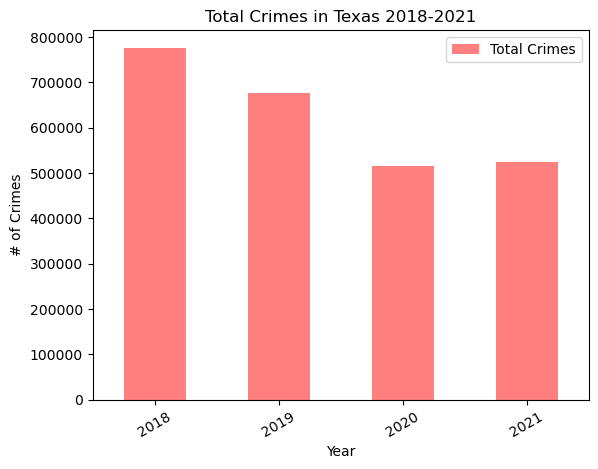

In [ ]:
# Plot crimes in bar chart
tx_crime_df.plot.bar(x='Year', y='Total Crimes', align="center", color='r', alpha=0.5)
plt.title("Total Crimes in Texas 2018-2021")
plt.xlabel("Year")
plt.ylabel("# of Crimes")
plt.xticks(rotation=30)

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

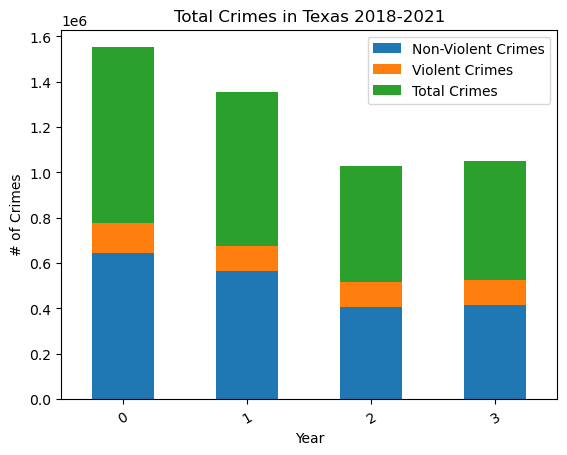

In [ ]:
# Plot crimes in stacked bar chart
tx_crime_df[["Non-Violent Crimes", "Violent Crimes", "Total Crimes"]].plot(kind='bar', stacked=True)

plt.title("Total Crimes in Texas 2018-2021")
plt.xlabel("Year")
plt.ylabel("# of Crimes")
plt.xticks(rotation=30)

In [ ]:
# Plot the total crimes using a line graph
plt.plot(tx_crime_pivot['Year'], tx_crime_pivot['total_crimes'])

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Total Crimes')

# Define a custom FuncFormatter to display the y-axis labels in a custom format
def y_fmt(y, pos):
    return '{:,.0f}'.format(y/1e6) + ' million'

# Use the custom formatter function for the y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))

# Show the plot
plt.show()

### CALIFORNIA Crime Data

In [70]:
# API endpoint and API key for California crime data
base_data = 'https://api.usa.gov/crime/fbi/cde/'
query_ca = 'arrest/state/CA/all?from=2018&to=2021&API_KEY='
key_ca = api_key

# Make the API request for CA crime data and load the response as JSON
response_ca = requests.get(base_data + query_ca + key_ca)

# Check if the API request was successful
if response_ca.status_code == 200:
    data_data = json.loads(response_ca.content)
else:
    print("Error {}".format(response_ca.status_code))

In [76]:
# Convert the response to a DataFrame for California crime data
ca_crime_df = pd.DataFrame(data_data['data'])
# Rename year column
ca_crime_df = ca_crime_df.rename(columns={'data_year': 'Year'})
ca_crime_df

,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2018,89618,293353,1529,35230,652,3451,127250,219251,58286,...,6418,2539,16670,81812,16227,1,7290,16652,28290,8901
1,2019,85533,271853,1575,33741,711,3265,122594,218674,55098,...,5786,2203,15795,79617,15168,0,4793,16811,27496,8803
2,2020,83289,196723,2051,26220,395,2636,95778,185985,35841,...,4453,2060,13636,68962,14631,0,3289,17493,28407,7258
3,2021,3373,40427,139,910,56,97,4858,11629,0,...,363,67,812,8565,1218,0,322,1354,2103,125


In [77]:
# Get sum of all violent crime categories and add to new columng called "Violent Crimes"
ca_crime_df['Violent Crimes'] = ca_crime_df.loc[:, ['Aggravated Assault', 
                                            'Murder and Nonnegligent Manslaughter', 
                                            'Rape', 'Robbery', 'Simple Assault']].sum(axis=1)
# Get sum of all non-violent crime categories and add to new columng called "Violent Crimes"                                        
ca_crime_df['Non-Violent Crimes'] = ca_crime_df.loc[:, ['All Other Offenses (Except Traffic)', 'Arson', 
                                            'Burglary','Curfew and Loitering Law Violations', 'Disorderly Conduct',
                                            'Driving Under the Influence', 'Drug Abuse Violations - Grand Total',
                                            'Drunkenness', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud',
                                            'Gambling - Total', 'Human Trafficking - Commercial Sex Acts',
                                            'Human Trafficking - Involuntary Servitude', 'Larceny - Theft',
                                            'Liquor Laws', 'Manslaughter by Negligence', 'Motor Vehicle Theft',
                                            'Offenses Against the Family and Children','Prostitution and Commercialized Vice',
                                            'Stolen Property: Buying, Receiving, Possessing',
                                            'Suspicion', 'Vagrancy', 'Vandalism','Weapons: Carrying, Possessing, Etc.',
                                            'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)']].sum(axis=1)
# Drop all columns except totals and data years
ca_crime_df.drop(
    labels=["Aggravated Assault","All Other Offenses (Except Traffic)", "Arson", "Burglary",
       "Curfew and Loitering Law Violations", "Disorderly Conduct","Driving Under the Influence",
       "Drug Abuse Violations - Grand Total", "Drunkenness", "Embezzlement", "Forgery and Counterfeiting", "Fraud",
       "Gambling - Total", "Human Trafficking - Commercial Sex Acts", "Human Trafficking - Involuntary Servitude",
       "Larceny - Theft", "Liquor Laws", "Manslaughter by Negligence", "Motor Vehicle Theft",
       "Murder and Nonnegligent Manslaughter", "Offenses Against the Family and Children","Prostitution and Commercialized Vice",
       "Rape", "Robbery", "Simple Assault", "Stolen Property: Buying, Receiving, Possessing", "Suspicion", "Vagrancy", "Vandalism",
       "Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"],
       axis=1, inplace=True)
# Add total crimes column
ca_crime_df['Total Crimes'] = ca_crime_df.loc[:, ['Non-Violent Crimes', 'Violent Crimes']].sum(axis=1)
ca_crime_df

,Year,Violent Crimes,Non-Violent Crimes,Total Crimes
0,2018,192048,901275,1093323
1,2019,184468,860307,1044775
2,2020,169541,678325,847866
3,2021,12887,67223,80110


(array([0, 1, 2, 3]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021')])

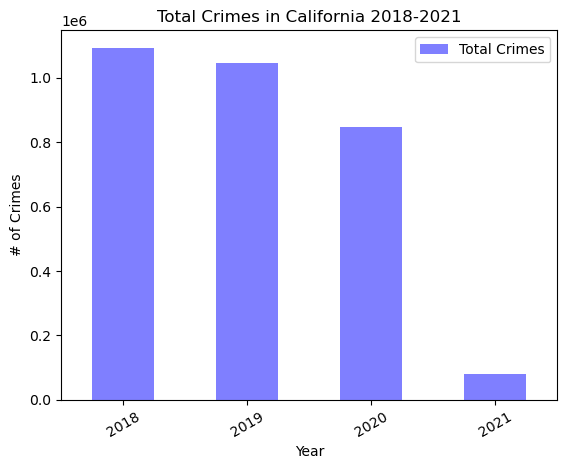

In [79]:
# Plot crimes in bar chart
ca_crime_df.plot.bar(x='Year', y='Total Crimes', align="center", color='b', alpha=0.5)
plt.title("Total Crimes in California 2018-2021")
plt.xlabel("Year")
plt.ylabel("# of Crimes")
plt.xticks(rotation=30)

### MICHIGAN Crime Data

In [90]:
# API endpoint and API key for MI crime data
base_data = 'https://api.usa.gov/crime/fbi/cde/'
query_mi = 'arrest/state/MI/all?from=2018&to=2021&API_KEY='
key_mi = api_key

# Make the API request for MI crime data and load the response as JSON
response_mi = requests.get(base_data + query_mi + key_mi)

# Check if the API request was successful
if response_mi.status_code == 200:
    data_data = json.loads(response_mi.content)
else:
    print("Error {}".format(response_mi.status_code))

In [91]:
# Convert the response to a DataFrame for California crime data
mi_crime_df = pd.DataFrame(data_data['data'])
# Rename year column
mi_crime_df = mi_crime_df.rename(columns={'data_year': 'Year'})
mi_crime_df

,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,Drunkenness,...,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2018,10351,84988,208,3056,250,5727,26193,30719,284,...,224,1005,1207,29318,1997,0,105,2898,4792,684
1,2019,10169,81463,220,2584,187,5584,25835,13963,346,...,451,908,1275,29125,2210,0,79,3030,5398,620
2,2020,10847,48000,192,2374,115,3760,20868,11285,125,...,213,761,1060,26895,2134,0,55,2673,9376,486
3,2021,10597,44631,196,2083,112,3343,21397,12392,0,...,104,824,886,25970,2156,0,34,2785,10145,553


In [92]:
# Get sum of all violent crime categories and add to new columng called "Violent Crimes"
mi_crime_df['Violent Crimes'] = mi_crime_df.loc[:, ['Aggravated Assault', 
                                            'Murder and Nonnegligent Manslaughter', 
                                            'Rape', 'Robbery', 'Simple Assault']].sum(axis=1)
# Get sum of all non-violent crime categories and add to new columng called "Violent Crimes"                                        
mi_crime_df['Non-Violent Crimes'] = mi_crime_df.loc[:, ['All Other Offenses (Except Traffic)', 'Arson', 
                                            'Burglary','Curfew and Loitering Law Violations', 'Disorderly Conduct',
                                            'Driving Under the Influence', 'Drug Abuse Violations - Grand Total',
                                            'Drunkenness', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud',
                                            'Gambling - Total', 'Human Trafficking - Commercial Sex Acts',
                                            'Human Trafficking - Involuntary Servitude', 'Larceny - Theft',
                                            'Liquor Laws', 'Manslaughter by Negligence', 'Motor Vehicle Theft',
                                            'Offenses Against the Family and Children','Prostitution and Commercialized Vice',
                                            'Stolen Property: Buying, Receiving, Possessing',
                                            'Suspicion', 'Vagrancy', 'Vandalism','Weapons: Carrying, Possessing, Etc.',
                                            'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)']].sum(axis=1)
# Drop all columns except totals and data years
mi_crime_df.drop(
    labels=["Aggravated Assault","All Other Offenses (Except Traffic)", "Arson", "Burglary",
       "Curfew and Loitering Law Violations", "Disorderly Conduct","Driving Under the Influence",
       "Drug Abuse Violations - Grand Total", "Drunkenness", "Embezzlement", "Forgery and Counterfeiting", "Fraud",
       "Gambling - Total", "Human Trafficking - Commercial Sex Acts", "Human Trafficking - Involuntary Servitude",
       "Larceny - Theft", "Liquor Laws", "Manslaughter by Negligence", "Motor Vehicle Theft",
       "Murder and Nonnegligent Manslaughter", "Offenses Against the Family and Children","Prostitution and Commercialized Vice",
       "Rape", "Robbery", "Simple Assault", "Stolen Property: Buying, Receiving, Possessing", "Suspicion", "Vagrancy", "Vandalism",
       "Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"],
       axis=1, inplace=True)
# Add total crimes column
mi_crime_df['Total Crimes'] = mi_crime_df.loc[:, ['Non-Violent Crimes', 'Violent Crimes']].sum(axis=1)
mi_crime_df

,Year,Violent Crimes,Non-Violent Crimes,Total Crimes
0,2018,42164,195441,237605
1,2019,41832,173433,215265
2,2020,39911,121423,161334
3,2021,38655,117056,155711
